In [1]:
import matplotlib.pyplot as plt
import numpy as np
import obspy

from obspy.imaging.beachball import beachball
from obspy.imaging.beachball import beach
from obspy.imaging.source import plot_radiation_pattern

In [2]:
def getmt(fault):
    rad = 180./np.pi; m0 = 1
    st,dp,rk = fault

    st = st/rad; dp = dp/rad; rk = rk/rad
    sd = np.sin(dp); cd = np.cos(dp)
    sd2 = np.sin(2*dp); cd2 = np.cos(2*dp)
    ss = np.sin(st); cs = np.cos(st)
    ss2 = np.sin(2*st); cs2 = np.cos(2*st)
    sr = np.sin(rk); cr = np.cos(rk)

    # formulas from Aki & Richards Box 4.4
    # mt(1-6): Mrr, Mtt, Mff, Mrt, Mrf, Mtf
    # mt(1-6): Mzz, Mxx, Myy, Mzx, -Mzy, -Mxy
    mt = [ sr*sd2, -1.*sd*cr*ss2 - sd2*sr*ss*ss, sd*cr*ss2 - sd2*sr*cs*cs, -1.*cd*cr*cs - cd2*sr*ss, cd*cr*ss - cd2*sr*cs, -1.*sd*cr*cs2 - 0.5*sd2*sr*ss2]
    return mt

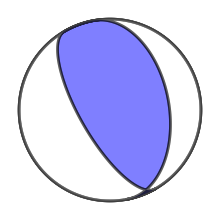

In [3]:
#(strike, dip, and rake)
s0173a = [150, 60, 80]
fig173a = beachball(s0173a, alpha=0.5, outfile='beachballs/bb1_s0173a.png')
mt173a = getmt(s0173a)

<IPython.core.display.Javascript object>


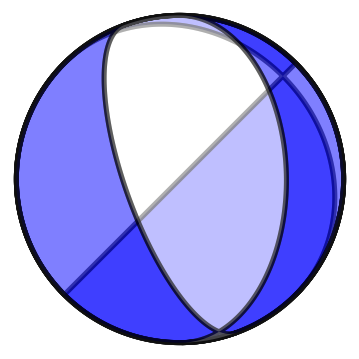

/anaconda3/envs/REU2020/lib/python3.7/site-packages/obspy/imaging/beachball.py:254: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, aspect='equal')


In [18]:
%matplotlib notebook
s0173a = [45, 90, -100]
fig173a = beachball(s0173a, alpha=0.5)

s0173ab = [160,60,-100]
fig173ab = beachball(s0173ab, alpha=0.5, fig=fig173a)

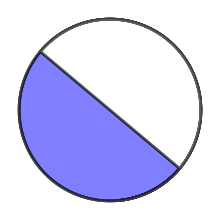

In [5]:
s0235b = [130, 90, -90]
fig235b = beachball(s0235b, alpha=0.5)
mt235b = getmt(s0235b)

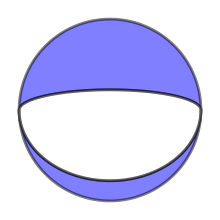

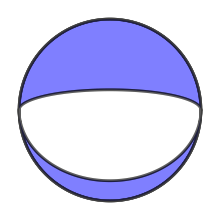

In [6]:
s0235b = [270, 70, -90]
fig235b = beachball(s0235b, alpha=0.5)

s0235b = [90, 20, -90]
fig235b = beachball(s0235b, alpha=0.5)

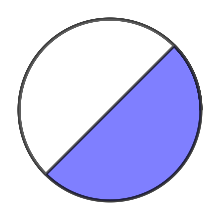

In [7]:
s0325a = [45, 90, -90]
fig325a = beachball(s0325a, alpha=0.5)
mt325a = getmt(s0325a)

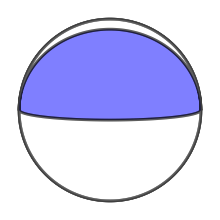

In [8]:
s0325ab = [90, 80, 90]
fig325ab = beachball(s0325ab, alpha=0.5)
mt325ab = getmt(s0325ab)

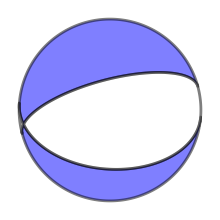

In [15]:
s0183a = [255,60,-100]
fig183a = beachball(s0183a, alpha=0.5)

In [19]:
import pandas as pd

faults = pd.read_csv("uniquefaults_trial.csv")
print(faults.iloc[:10])

   Strike  Dip  Rake         P        SV        SH     SH/SV      P/SV  \
0      40   20   100  0.443520  3.654640  2.661049  0.728129  0.121358   
1      50   70   -90  0.771536  2.047279  1.398608  0.683155  0.376859   
2      50   70    90  0.771536  2.047279  1.398608  0.683155  0.376859   
3     125    0    45  0.958960  0.983998  0.760419  0.772786  0.974555   
4     125   80     0  0.218840  2.441521  1.667314  0.682900  0.089633   
5     130   20   -90  0.770852  2.044803  1.403949  0.686594  0.376981   
6     130   20    90  0.770852  2.044803  1.403949  0.686594  0.376981   
7     130   45    45  0.504169  3.782292  2.985715  0.789393  0.133297   
8     130   70     0  0.102221  2.322729  1.557488  0.670542  0.044009   
9     140   20    45  0.904043  1.837994  1.360875  0.740413  0.491864   

       P/SH              source  
0  0.166671  S0173a_DWAK_10.csv  
1  0.551646  S0173a_DWAK_10.csv  
2  0.551646  S0173a_DWAK_10.csv  
3  1.261094  S0173a_DWAK_10.csv  
4  0.131253  S0

In [23]:
faults = pd.read_csv("uniquefaults_trial.csv", usecols=[0,1,2])
print(faults.iloc[:10])

   Strike  Dip  Rake
0      40   20   100
1      50   70   -90
2      50   70    90
3     125    0    45
4     125   80     0
5     130   20   -90
6     130   20    90
7     130   45    45
8     130   70     0
9     140   20    45


In [35]:
trial = faults.iloc[:10]
faults_ls =[] 

for index, rows in trial.iterrows(): 
    my_list =[rows.Strike, rows.Dip, rows.Rake] 
    faults_ls.append(my_list) 
    
print(faults_ls)

[[40, 20, 100], [50, 70, -90], [50, 70, 90], [125, 0, 45], [125, 80, 0], [130, 20, -90], [130, 20, 90], [130, 45, 45], [130, 70, 0], [140, 20, 45], [140, 20, 100], [140, 60, -100], [140, 60, -90], [140, 60, 45], [140, 60, 90], [140, 60, 100], [140, 70, 45], [140, 80, 45], [150, 70, -90], [150, 70, 90], [150, 90, 0], [155, 70, 100], [155, 80, -100], [160, 0, -100], [160, 70, 0], [160, 80, -90], [160, 80, 90], [40, 0, -100], [40, 0, -90], [40, 0, 45], [40, 0, 0], [40, 0, 90], [40, 0, 100], [40, 80, -90], [40, 80, 90], [40, 90, -90], [40, 90, 90], [45, 0, -100], [45, 0, -90], [45, 0, 45], [45, 0, 0], [45, 0, 90], [45, 0, 100], [45, 80, -90], [45, 80, 90], [45, 90, -90], [45, 90, 90], [50, 0, -100], [50, 0, -90], [50, 0, 45], [50, 0, 0], [50, 0, 90], [50, 0, 100], [50, 80, -90], [50, 80, 90], [50, 90, -90], [50, 90, 90], [110, 0, -100], [110, 0, -90], [110, 0, 45], [110, 0, 0], [110, 0, 90], [110, 0, 100], [110, 90, -90], [110, 90, 90], [112, 0, -100], [112, 0, -90], [112, 0, 45], [112, 0,

<IPython.core.display.Javascript object>


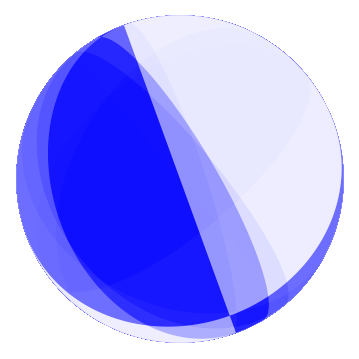

In [36]:
%matplotlib notebook

n = 0
for fault in faults_ls:
    if n == 0:
        fig = beachball(fault, alpha = 0.5, edgecolor = None)
        
    else:
        fig2 = beachball(fault, alpha=0.5, edgecolor = None, fig=fig)
    n += 1